In [1]:
#the idea and implementation of the feature extraction was taken from the following website:
'''
***************************************************************************************/
*    Title: Sentiment Analysis using Logistic Regression and Naive Bayes
*    Author: Momin Mehmood Butt
*    Date: 2020
*    Availability: https://towardsdatascience.com/sentiment-analysis-of-twitters-us-airlines-data-using-knn-classification-91c7da987e13
*
***************************************************************************************/
'''
#import packages
import numpy as np
import random
import math
import string
import csv
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from matplotlib import pyplot as plt
!wget https://raw.githubusercontent.com/lee1613/Sentiment-Analysis-NLP-/main/dataset.csv

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


--2023-04-01 13:15:51--  https://raw.githubusercontent.com/lee1613/Sentiment-Analysis-NLP-/main/dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1273144 (1.2M) [text/plain]
Saving to: ‘dataset.csv.1’

dataset.csv.1       100%[===================>]   1.21M  --.-KB/s    in 0.05s   

2023-04-01 13:15:51 (22.8 MB/s) - ‘dataset.csv.1’ saved [1273144/1273144]



In [2]:
#loading of dataset here
with open("dataset.csv") as f: 
    reader = csv.reader(f,delimiter = ",")
    labels  = []
    comments = []
    counter = 0
    for line in reader:
        labels += line[0]
        comments += [line[1]]

comments = np.array(comments) #sentences
labels = np.array(labels) #labels for each sentence
labels = labels.astype(int)
print(comments.size, labels.size)
print(comments[21])

10662 10662
with a cast that includes some of the top actors working in independent film , lovely & amazing involves us because it is so incisive , so bleakly amusing about how we go about our lives .


In [3]:
#preprocessing of data: no punctuations/special characters/fluff words
for i, sen in enumerate(comments):
  comments[i] = sen.lower() #set sentences to lowercase
stopwords = stopwords.words('english')
special_chars = ["!",'"',"%","&","'","(",")", "*","+",",","-",".",
                  "/",":",";","<","=",">","?","[","\\","]","^","_",
                  "`","{","|","}","~","–","@","#","$"]
for i, sen in enumerate(comments):
  temp = ''
  for word in sen.split():
    if word not in stopwords and word not in special_chars: #removes stopwords and special characters
      temp = temp + ' ' + word #appends the remaining words together
  comments[i] = temp

print(comments)

[" rock destined 21st century's new conan he's going make splash even greater arnold schwarzenegger jean-claud van damme steven segal"
 " gorgeously elaborate continuation lord rings trilogy huge column words cannot adequately describe co-writer/director peter jackson's expanded vision j r r tolkien's middle-earth"
 ' effective too-tepid biopic' ...
 " stands crocodile hunter hurried badly cobbled look 1959 godzilla combined scenes japanese monster flick canned shots raymond burr commenting monster's path destruction"
 ' thing looks like made-for-home-video quickie'
 ' enigma well-made dry placid']


In [4]:
#counting all unique words, and puts them into an ordered list based on occurrence
top_words = {}
total = 0
for sentence in comments:
  words = sentence.split()
  for word in words:
    if top_words.get(word):
      top_words[word] += 1
    elif word not in string.punctuation:
      top_words[word] = 1
top_words = sorted(top_words.items(), key=lambda x:x[1])[::-1] #sorts words based on occurrence
top_words = np.array(top_words)[:, 0]
print(top_words, top_words.size)

['film' 'movie' 'one' ... 'segal' 'jean-claud' "century's"] 21221


In [5]:
#creating feature matrix. A vector for each sentence is created, and each vector 
#represents the number of occurrences of each word in the sentence. Hence, each vector has the length
#of the top_words list created earlier.
train_matrix = []
for sentence in comments:
  train_featurevec = []
  word = sentence.split()
  for w in top_words:
    train_featurevec.append(word.count(w)) #creating features foreach sentence 
  train_matrix.append(train_featurevec)
train_matrix = np.array(train_matrix)
print(train_matrix.shape)

(10662, 21221)


In [6]:
# splitting the data sets into k proportion of the training datasets and the rest as testing dataset k is adjusttable
n = train_matrix.shape[0]
training_n = int(n*.8)
testing_n = n - training_n
list_of_indices = np.arange(0,n) 
np.random.seed(0) #setting the seed to make data randomization across the board the same, can comment out and run to check for consistency in model
np.random.shuffle(list_of_indices) #randomly shuffles all data
training_indices =list_of_indices[:training_n]
testing_indices = list_of_indices[training_n:]
train_x = np.array([train_matrix[i] for i in training_indices])
train_y = np.array([labels[i] for i in training_indices])
test_x = np.array([train_matrix[i] for i in testing_indices])
test_y = np.array([labels[i] for i in testing_indices])
print(train_x.shape,train_y.size,test_x.shape, test_y.size)

(8529, 21221) 8529 (2133, 21221) 2133


[0.5954055321143928, 0.5710267229254571, 0.5668073136427567, 0.5550867323019222, 0.5541490857946554]


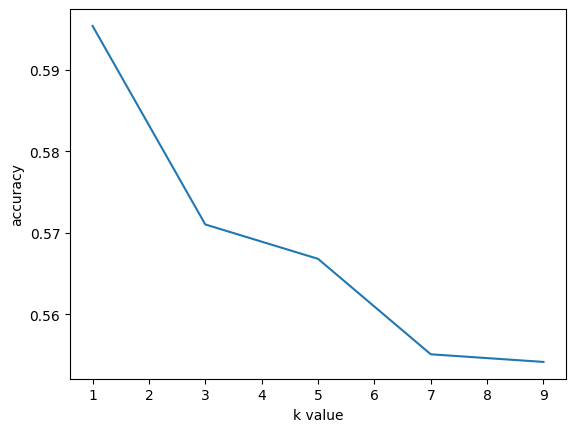

In [7]:
#kNN algo is run here. Based on the graph produced, the best k-value can be used in the next cell.
accuracy = []
k_range = range(1, 10, 2)
for k in k_range:
  classifier = KNeighborsClassifier(n_neighbors=k,algorithm='brute') #using scikit learn KNN method for training model
  classifier.fit(train_x, train_y)
  predicted_label = classifier.predict(test_x)
  accuracy.append(metrics.accuracy_score(test_y,predicted_label))
plt.plot(k_range, accuracy) #plotting accuracy based on k-value used
plt.xlabel('k value')
plt.ylabel('accuracy')
print(accuracy)

In [8]:
k = 1 # set optimal value of k here to view metrics and confusion metric for the best k-value
classifier = KNeighborsClassifier(n_neighbors=k,algorithm='brute') #using scikit learn KNN method for training model
classifier.fit(train_x, train_y)
y_predicted = classifier.predict(test_x)
#prints confusion matrix for test data
result = metrics.confusion_matrix(test_y,y_predicted)
print(result)
#prints metrics for test data
print(f"Accuracy = {metrics.accuracy_score(test_y,y_predicted)*100:.2f}%")
print(f"F1 score = {metrics.f1_score(test_y,y_predicted)*100:.2f}%")
print(f"Precision = {metrics.precision_score(test_y,y_predicted)*100:.2f}%")
print(f"Recall = {metrics.recall_score(test_y,y_predicted)*100:.2f}%")

[[746 297]
 [566 524]]
Accuracy = 59.54%
F1 score = 54.84%
Precision = 63.82%
Recall = 48.07%
